In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Netflix Titles

Dataset from Kaggle: 
https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv

## Load
First we load our data from the CSV file and take a first look of the complete dataset

In [48]:
df_netflix = pd.read_csv('netflix_titles.csv')

In [49]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [50]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [51]:
df_netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [52]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

## Transform

As we find out before, we have some missing data. The director and the cast are no important for this analysis, so we can just drop those columns. For the rating and the date_added the null data is negligible, so we are also going to drop these few lines.

Now, lets see the country. We have 476 nulls. This is almost 8% of our data, so we can't just get rid of it like it is nothing. One option, is filling the missing data with the mode (because it's a categorical variable).

In [55]:
df_netflix = df_netflix[df_netflix['date_added'].notna()]

In [57]:
df_netflix = df_netflix[df_netflix['rating'].notna()]

In [60]:
df_netflix = df_netflix.drop(['director', 'cast'], axis = 1)

In [67]:
df_netflix['country'] = df_netflix['country'].fillna(df_netflix['country'].mode()[0])

In [69]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   country       6214 non-null   object
 4   date_added    6214 non-null   object
 5   release_year  6214 non-null   int64 
 6   rating        6214 non-null   object
 7   duration      6214 non-null   object
 8   listed_in     6214 non-null   object
 9   description   6214 non-null   object
dtypes: int64(2), object(8)
memory usage: 694.0+ KB


### New columns and fixing datatype
Now that we don't have any null data, we are going to change the Dtype of the 'date_added' category and extract the year as a new category which can be useful to analyze.
We also have to change th type and the rating to categorical.

In [71]:
df_netflix['date_added'] = df_netflix['date_added'].apply(lambda x: pd.to_datetime(x, errors = 'coerce', utc = True))

In [75]:
df_netflix['year_added'] = pd.DatetimeIndex(df_netflix['date_added']).year

In [77]:
df_netflix['type'] = pd.Categorical(df_netflix['type'])

In [80]:
df_netflix['rating'] = pd.Categorical(df_netflix['rating'])

In [81]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   show_id       6214 non-null   int64              
 1   type          6214 non-null   category           
 2   title         6214 non-null   object             
 3   country       6214 non-null   object             
 4   date_added    6214 non-null   datetime64[ns, UTC]
 5   release_year  6214 non-null   int64              
 6   rating        6214 non-null   category           
 7   duration      6214 non-null   object             
 8   listed_in     6214 non-null   object             
 9   description   6214 non-null   object             
 10  year_added    6214 non-null   int64              
dtypes: category(2), datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 658.4+ KB


## Visualization
In this excersise we are going to explore the libraries seaborn and matplotlib for data visualization

In [82]:
df_netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09 00:00:00+00:00,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016-09-09 00:00:00+00:00,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,United States,2018-09-08 00:00:00+00:00,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2018-09-08 00:00:00+00:00,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,United States,2017-09-08 00:00:00+00:00,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


<AxesSubplot:ylabel='type'>

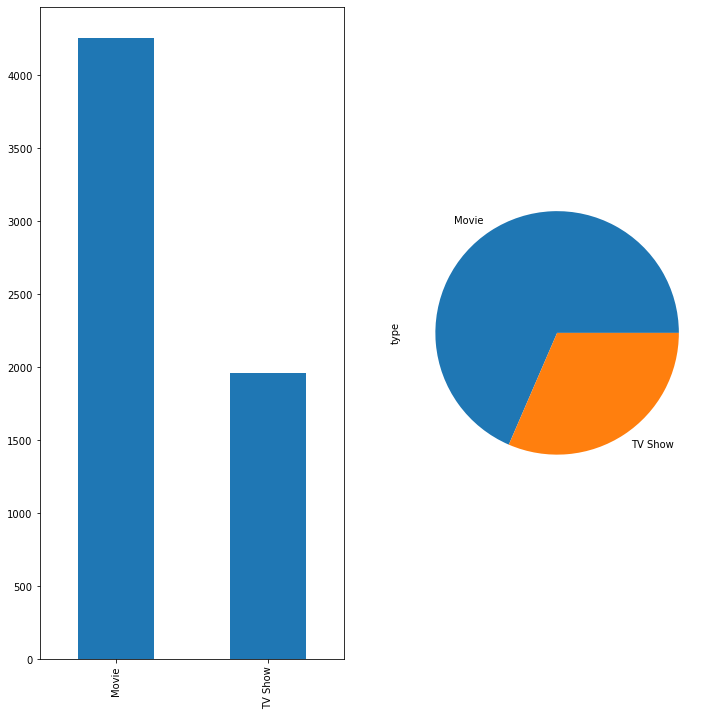

In [102]:
fig, ax = plt.subplots(1, 2)
df_netflix['type'].value_counts().plot(kind = 'bar', ax = ax[0])
df_netflix['type'].value_counts().plot(kind = 'pie', ax = ax[1], figsize=(12,12))

<AxesSubplot:>

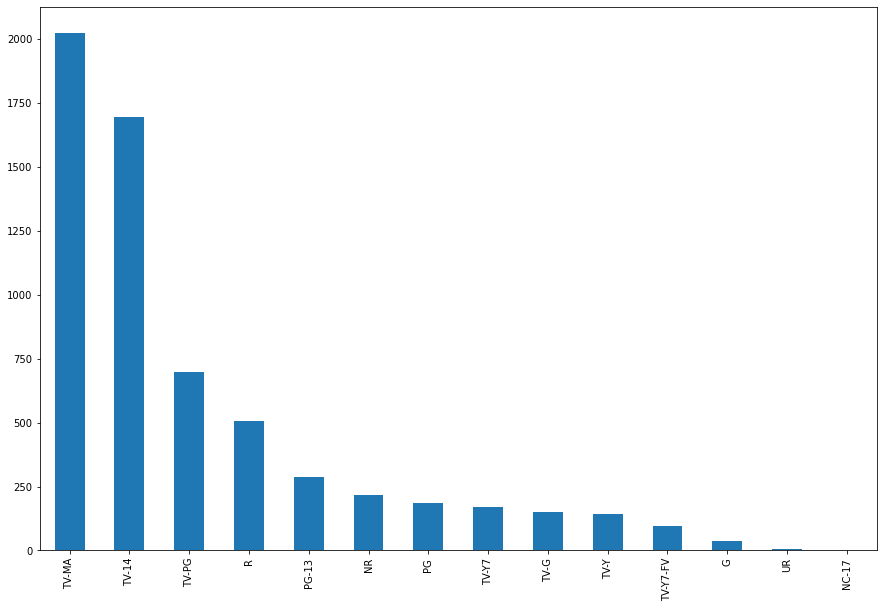

In [109]:
df_netflix['rating'].value_counts().plot(kind = 'bar', figsize = (15,10))

From these charts, we can see that most of the Netflix catalgue are movies, and most of it its rated TV-MA and TV-14 which are intended for mature audience, or children above 14 (with parental guidance)

<AxesSubplot:ylabel='country'>

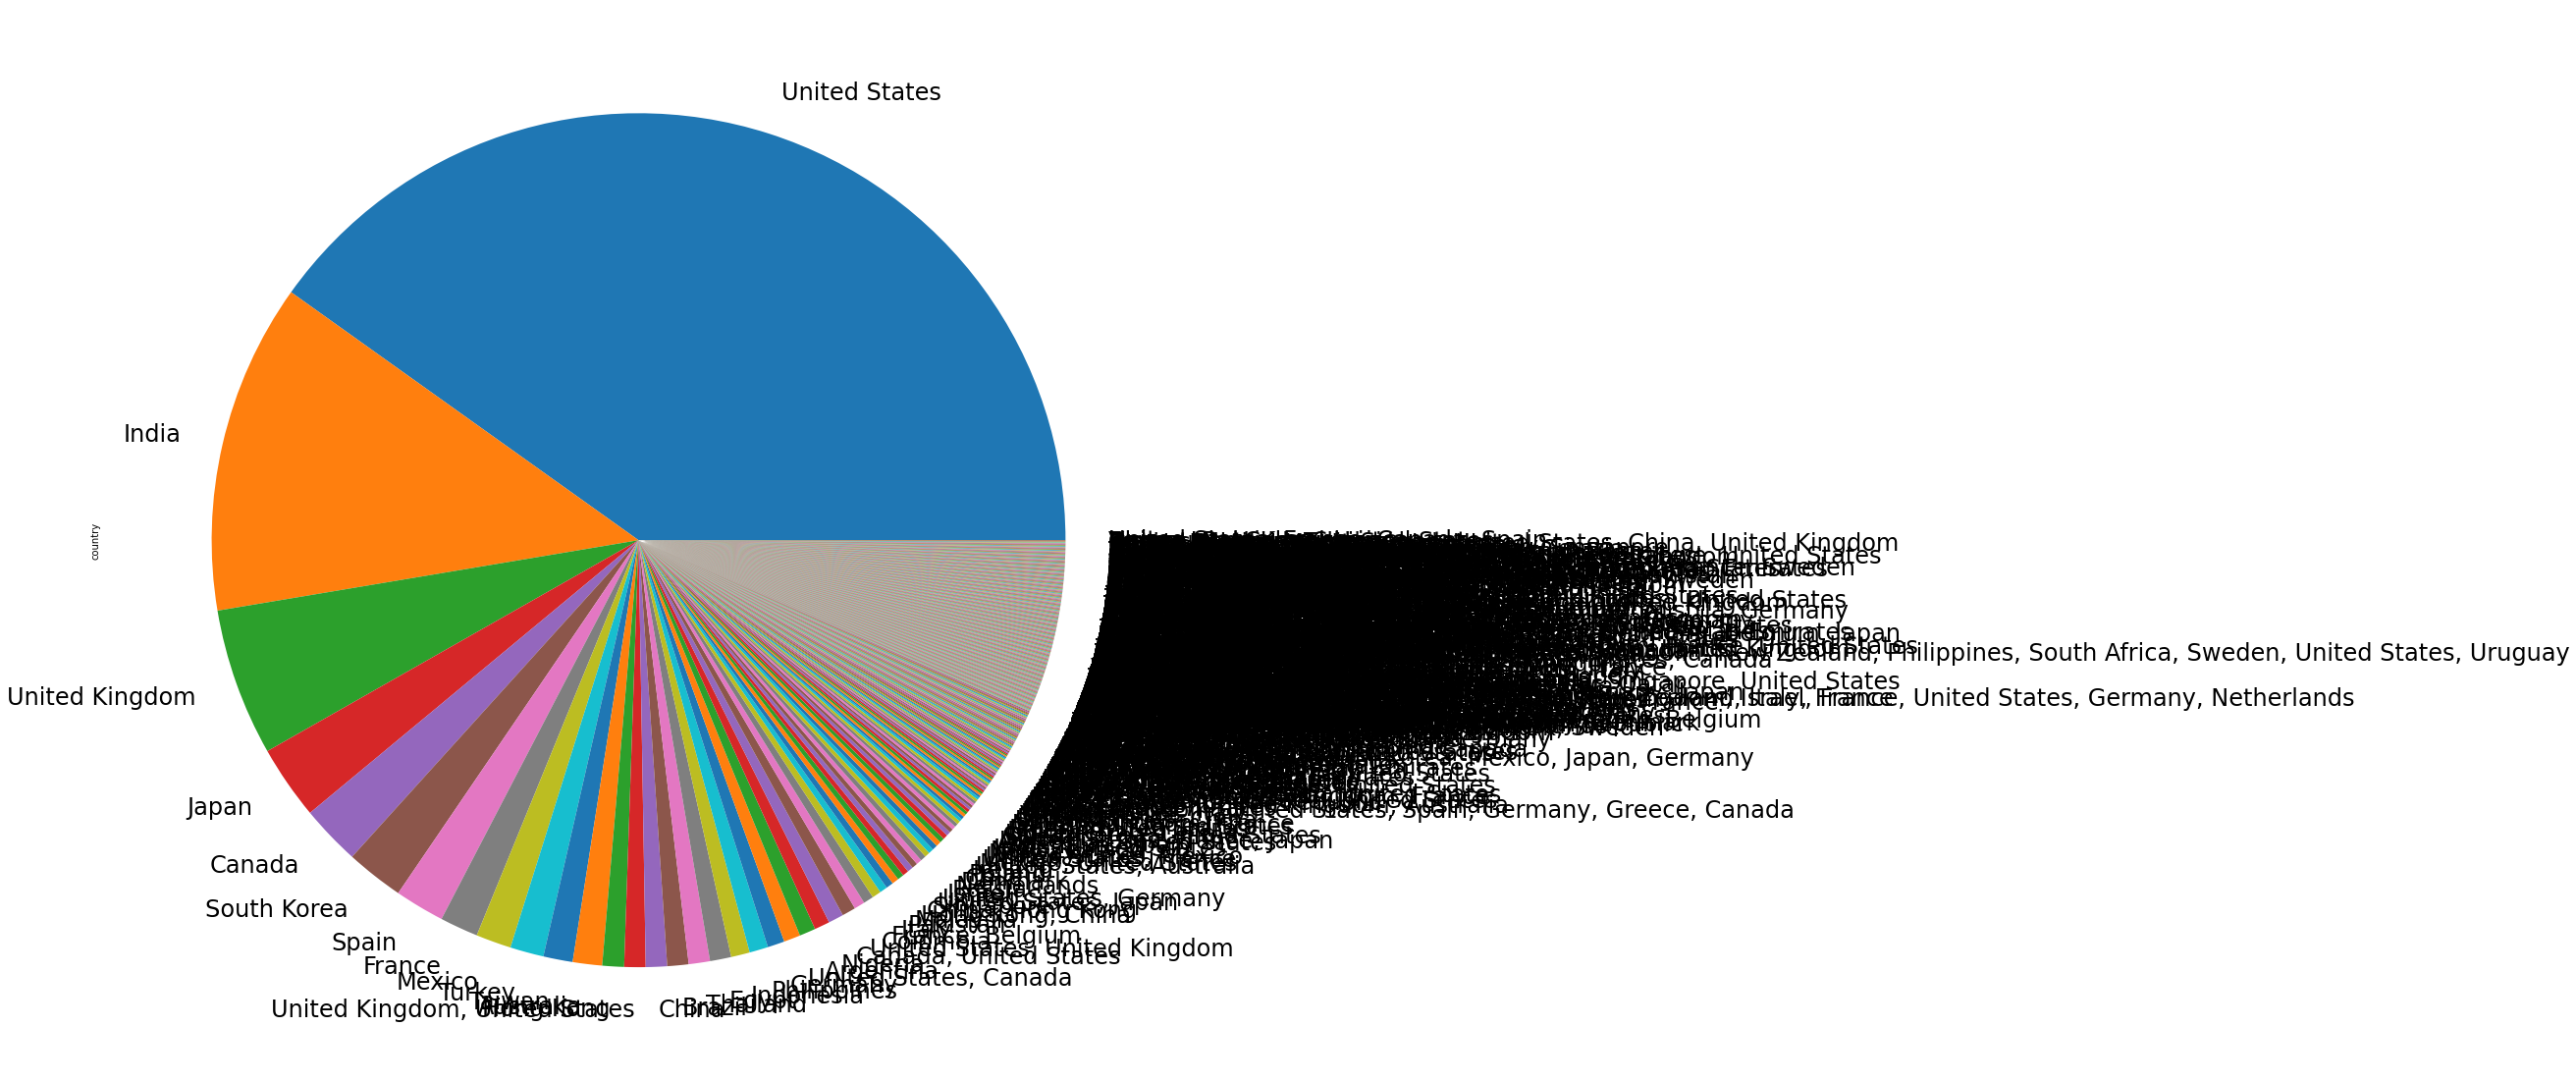

In [136]:
df_netflix['country'].value_counts().plot(kind = 'pie', figsize =(20,20), fontsize = 24)

As we saw before, there are 554 unique values for the 'country' category, so, it's no very practical to plot it in a pie chart. Lets better plot the first categories for a better look:

In [135]:
df_netflix['country'].value_counts().head(20)

United States                    2494
India                             777
United Kingdom                    347
Japan                             174
Canada                            141
South Korea                       136
Spain                             117
France                             90
Mexico                             83
Turkey                             79
Taiwan                             69
Australia                          69
Hong Kong                          51
United Kingdom, United States      50
China                              50
Brazil                             50
Thailand                           50
Egypt                              50
Indonesia                          44
Philippines                        44
Name: country, dtype: int64

<AxesSubplot:>

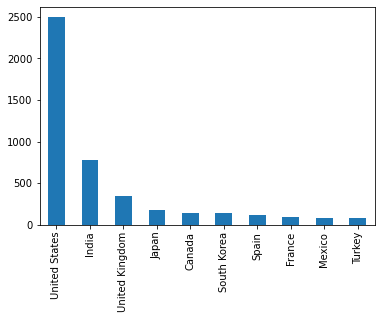

In [134]:
df_netflix['country'].value_counts().head(10).plot.bar()

The data is showing us that most of the content were filmed int the USA (which makes sense) and India and the UK fill the second and third place.

Now, lets take a look to the Netflix catalogue growth in time.

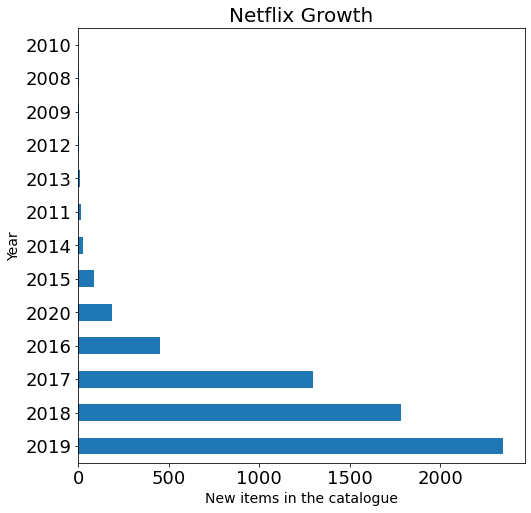

In [172]:
df_netflix['year_added'].value_counts().plot.barh(figsize = (8, 8), fontsize = 18)
plt.xlabel('New items in the catalogue', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.title('Netflix Growth', fontsize = 20)
plt.show()